In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('netflix_titles.csv')

# можно и так:
#filepath ='C:/ЛИЧНАЯ/Лера/Data science/CSV/netflix_titles.csv' 
#df = pd.read_csv(filepath)

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [5]:
print('Кино и шоу датированы с',df.release_year.min(),'и до', df.release_year.max())

Кино и шоу датированы с 1925 и до 2020


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 341.0+ KB


In [7]:
len(df.director.unique())

3302

In [8]:
# Сколько фильмов сняли в каждом году
amount_years = df.groupby('release_year')['title'].count().sort_values(ascending=False)

In [9]:
# 10 лет, в которых было выпущено максимальное количество фильмов
amount_years.head(10)

release_year
2018    1063
2017     959
2019     843
2016     830
2015     517
2014     288
2013     237
2012     183
2010     149
2011     136
Name: title, dtype: int64

In [16]:
# делаем из series dataframe, чтобы можно было построить график
amount_years_frame = pd.DataFrame({'release_year':amount_years.index, 'amount':amount_years.values})
amount_years_frame

,release_year,amount
0,2018,1063
1,2017,959
2,2019,843
3,2016,830
4,2015,517
...,...,...
67,1963,1
68,1964,1
69,1966,1
70,1970,1


<AxesSubplot:xlabel='Ось X', ylabel='Ось Y'>

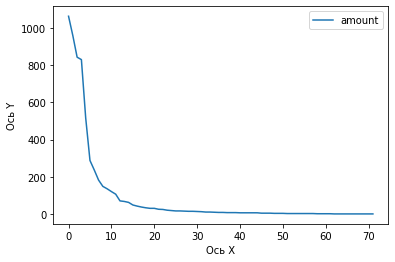

In [78]:
#plt.figure(figsize=(8,5))
plt.xlabel("Ось X")
plt.ylabel("Ось Y")
sns.lineplot(data=amount_years_frame['amount'], label = 'amount' )

Text(0.5, 23.09375, 'кино')

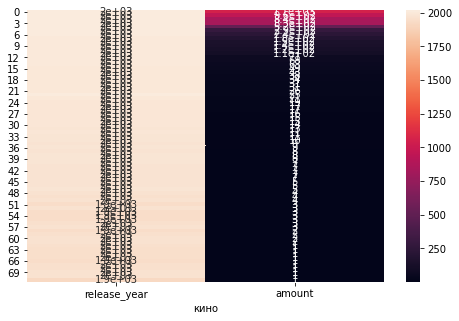

In [39]:
plt.figure(figsize=(8,5))
sns.heatmap(data=amount_years_frame, annot=True) #annot=True This ensures that the values for each cell appear on the chart. 
#(Leaving this out removes the numbers from each of the cells!) Короче, добавляет цифры на график
plt.xlabel("кино")

Text(0.5, 1.0, 'График выпуска фильмов или distribution of the release year for both Movies and TV Shows')

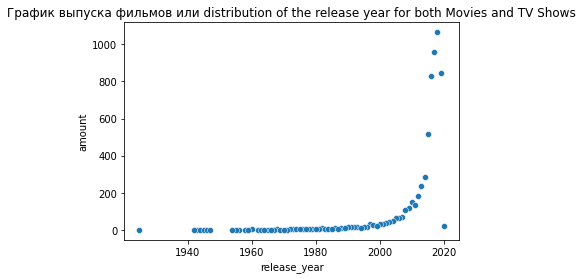

In [96]:
sns.scatterplot(x=amount_years_frame['release_year'], y=amount_years_frame['amount'])
plt.title("График выпуска фильмов или distribution of the release year for both Movies and TV Shows")


In [18]:
amount_years.max()

1063

### Год, в котором было выложено максимальное количество фильмов

In [19]:
amount_years.idxmax()

2018

In [20]:
df.describe()
df.release_year

0       2019
1       2016
2       2013
3       2016
4       2017
        ... 
6229    2015
6230    2016
6231    2016
6232    2013
6233    2003
Name: release_year, Length: 6234, dtype: int64

In [57]:
#Отсортируем фильмы, вышедшие после 2000 года
df[(df['release_year'] > 2000) & (df['type'] == 'Movie')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...
5580,80064521,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109 min,Documentaries,The journey of fashion designer Jeremy Scott f...


In [58]:
df.rating.unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [59]:
df.groupby('release_year').agg(['min', 'max', 'mean'])

show_id                        
                   min       max          mean
release_year                                  
1925          81030762  81030762  8.103076e+07
1942          60027942  60027945  6.002794e+07
1943          70013050  80119186  7.338493e+07
1944          80119189  80119194  8.011919e+07
1945          80119188  80119192  8.011919e+07
...                ...       ...           ...
2016          70143864  81227195  7.997158e+07
2017          70142386  81221913  8.016211e+07
2018          70140391  81224868  8.041100e+07
2019          70140358  81235729  8.054151e+07
2020          80117557  81214114  8.079387e+07

[72 rows x 3 columns]

In [60]:
country = df.groupby('country')['country'].count().sort_values(ascending=False)
country

country
United States                             2032
India                                      777
United Kingdom                             348
Japan                                      176
Canada                                     141
                                          ... 
Spain, Portugal                              1
Spain, Switzerland                           1
Spain, United Kingdom                        1
Spain, United Kingdom, United States         1
New Zealand, United Kingdom, Australia       1
Name: country, Length: 554, dtype: int64

### 10 стран лидеров по выпуску фильмов

In [61]:
country.head(10)

country
United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Name: country, dtype: int64

In [69]:
# делаем из series dataframe, чтобы можно было построить график
country_frame = pd.DataFrame({'country':country.index, 'amount':country.values})
country_frame_top = country_frame.head(10)

Text(0.5, 1.0, '10 стран лидеров по выпуску фильмов')

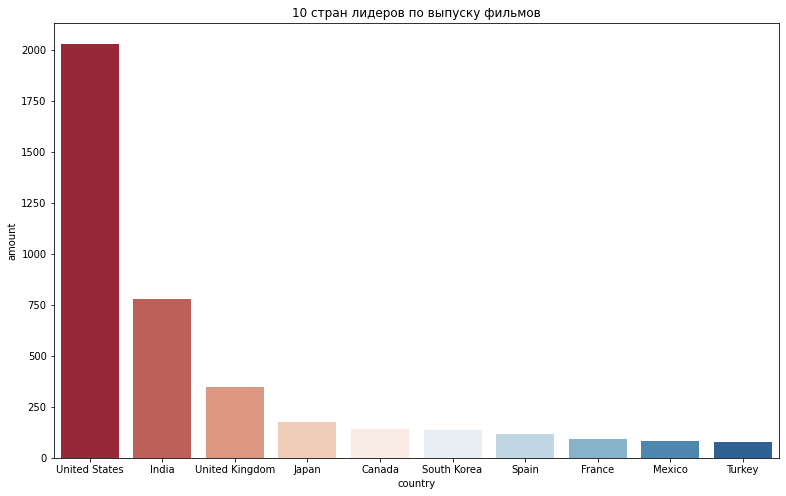

In [83]:
plt.figure(figsize=(13,8))
sns.barplot(x='country',y='amount', data=country_frame_top, order=country_frame_top['country'], palette='RdBu')
plt.title("10 стран лидеров по выпуску фильмов")

In [27]:
country.idxmax()

'United States'

In [28]:
# Страна, максимально выпустившая фильмов и шоу
country.max()

2032

In [29]:
# Страна, максимально выпустившая фильмов и шоу
df.loc[df.loc[:,'country'] == 'United States']['country'].count()

2032

In [30]:
df.type.count()

6234

In [87]:
# Выясним количество фильмов и TV шоу
type_amount = df.groupby('type')['type'].count()
type_amount

type
Movie      4265
TV Show    1969
Name: type, dtype: int64

In [88]:
type_amount_frame = pd.DataFrame({'type':type_amount.index, 'amount':type_amount.values})

Text(0.5, 1.0, 'Типы фильмов в Netflix')

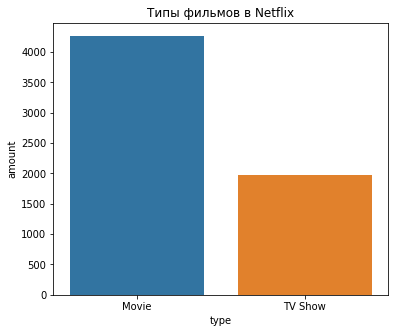

In [93]:
plt.figure(figsize=(6,5))
sns.barplot(x='type',y='amount', data=type_amount_frame, order=type_amount_frame['type'] )
plt.title("Типы фильмов в Netflix")

In [32]:
list(df.listed_in.unique())

['Children & Family Movies, Comedies',
 'Stand-Up Comedy',
 "Kids' TV",
 'Comedies',
 'Crime TV Shows, International TV Shows, Spanish-Language TV Shows',
 'International Movies, Sci-Fi & Fantasy, Thrillers',
 'Docuseries, Science & Nature TV',
 'Action & Adventure, Thrillers',
 'Action & Adventure, Dramas, International Movies',
 'Children & Family Movies',
 'Cult Movies, Dramas, Independent Movies',
 'Comedies, Independent Movies, Romantic Movies',
 'Action & Adventure, Comedies, International Movies',
 'Documentaries',
 'Horror Movies, Thrillers',
 'Dramas, Independent Movies',
 'Dramas, Independent Movies, Romantic Movies',
 'International TV Shows, Romantic TV Shows, TV Comedies',
 'Docuseries',
 'Horror Movies, International Movies',
 'Children & Family Movies, Comedies, Sci-Fi & Fantasy',
 'Comedies, Romantic Movies',
 'Dramas, International Movies, Thrillers',
 'Dramas, Independent Movies, International Movies',
 "Kids' TV, TV Comedies",
 'Comedies, Dramas, Independent Movies',

### Первая десятка режиссеров, по количеству снятых фильмов.

In [33]:
director_films_amount = df.groupby('director')['director'].count().sort_values(ascending=False)
director_films_amount.head(10)

director
Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Martin Scorsese            9
Steven Spielberg           9
David Dhawan               8
Lance Bangs                8
Johnnie To                 8
Quentin Tarantino          7
Name: director, dtype: int64

In [34]:
# или таким способом
df.director.value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Steven Spielberg           9
                          ..
Jonathan Hensleigh         1
Ridley Scott               1
Peter Sullivan             1
Andrew Douglas             1
Dilip Mehta                1
Name: director, Length: 3301, dtype: int64

In [35]:
# Максимальное количество фильмов, которое снял один режиссер =
print('Максимальное количество фильмов, которое снял один режиссер =',director_films_amount.max())

Максимальное количество фильмов, которое снял один режиссер = 18


### Список фильмов, которые снял режиссер, выпустивший максимальное количество фильмов

In [36]:
df.loc[df.loc[:,'director'] == 'Raúl Campos, Jan Suter']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1337,80183088,Movie,Mea Culpa,"Raúl Campos, Jan Suter",Alexis de Anda,Mexico,"November 10, 2017",2017,TV-MA,54 min,Stand-Up Comedy,"Raw and outspoken, comedian Alexis de Anda bar..."
1655,80192137,Movie,Fernando Sanjiao: Hombre,"Raúl Campos, Jan Suter",Fernando Sanjiao,Argentina,"May 25, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Argentine actor and comedian Fernando Sanjiao ...
1794,80192065,Movie,Carlos Ballarta: Furia Ñera,"Raúl Campos, Jan Suter",Carlos Ballarta,Mexico,"May 11, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Mexican comic Carlos Ballarta mocks himself an...
2035,80183197,Movie,Sofía Niño de Rivera: Selección Natural,"Raúl Campos, Jan Suter",Sofía Niño de Rivera,Mexico,"March 30, 2018",2018,TV-MA,62 min,Stand-Up Comedy,Mexico's Sofía Niño de Rivera brings her dark ...
2133,80192139,Movie,Malena Pichot: Estupidez compleja,"Raúl Campos, Jan Suter",Malena Pichot,Argentina,"March 2, 2018",2018,TV-MA,51 min,Stand-Up Comedy,An Argentine comedian espouses the values of f...
2134,80192063,Movie,Natalia Valdebenito: El especial,"Raúl Campos, Jan Suter",Natalia Valdebenito,Chile,"March 2, 2018",2018,TV-MA,69 min,Stand-Up Comedy,A Chilean comedian fuses activism with irrever...
2504,80191989,Movie,Jani Dueñas: Grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Jani Dueñas,Chile,"June 29, 2018",2018,TV-MA,77 min,Stand-Up Comedy,Chilean comedian and personality Jani Dueñas p...
2550,80097641,Movie,Sofía Niño de Rivera: Exposed,"Raúl Campos, Jan Suter",Sofía Niño de Rivera,Mexico,"June 24, 2016",2016,TV-MA,80 min,Stand-Up Comedy,Self-deprecating comic Sofía Niño de Rivera pu...
2783,80192064,Movie,Luciano Mellera: Infantiloide,"Raúl Campos, Jan Suter",Luciano Mellera,Argentina,"July 6, 2018",2018,TV-14,66 min,Stand-Up Comedy,Argentina's Luciano Mellera emphasizes the hum...
2834,80192135,Movie,Coco y Raulito: Carrusel de ternura,"Raúl Campos, Jan Suter","Coco Celis, Raúl Meneses",Mexico,"July 27, 2018",2018,TV-MA,57 min,Stand-Up Comedy,"A study in contrasts, comedy partners and good..."


### Десять самых популярных жанров

In [37]:
listed_in_amount = df.groupby('listed_in')['listed_in'].count().sort_values(ascending=False)
listed_in_amount.head(10)

listed_in
Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Kids' TV                                            159
Documentaries, International Movies                 150
Children & Family Movies, Comedies                  129
Children & Family Movies                            120
Comedies, International Movies                      120
Name: listed_in, dtype: int64

In [38]:
# или способ проще
df.listed_in.value_counts()

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
                                                   ... 
TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows         1
British TV Shows, Docuseries, Reality TV              1
Classic Movies, Cult Movies, Documentaries            1
Crime TV Shows, TV Comedies                           1
Comedies, Music & Musicals, Sports Movies             1
Name: listed_in, Length: 461, dtype: int64

### Top 10 artist present on Netflix:

In [39]:
actors = df.cast.value_counts()
actors.head(10)

David Attenborough    18
Samuel West           10
Jeff Dunham            7
Craig Sechler          6
Bill Burr              5
Iliza Shlesinger       5
Jim Gaffigan           5
Kevin Hart             4
Jay O. Sanders         4
Bill Hicks             4
Name: cast, dtype: int64

In [40]:
spisok_actors = df.loc[(df.loc[:,'cast'] == 'David Attenborough')]
spisok_actors    

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
774,70245168,TV Show,Nature's Great Events (2009),NaN,David Attenborough,"United States, United Kingdom","October 10, 2015",2009,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",This series looks at how seasonal changes caus...
775,70235731,TV Show,The Blue Planet: A Natural History of the Oceans,Alastair Fothergill,David Attenborough,United Kingdom,"October 10, 2015",2001,TV-G,1 Season,"British TV Shows, Docuseries, International TV...",David Attenborough narrates this definitive ex...
1778,80097726,TV Show,The Hunt,NaN,David Attenborough,United Kingdom,"May 14, 2017",2015,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",Witness some of the most riveting showdowns in...
2413,80172468,Movie,Nature: Raising the Dinosaur Giant,NaN,David Attenborough,United States,"March 1, 2017",2016,TV-G,53 min,Documentaries,Sir David Attenborough examines a recently dis...
2594,80005588,TV Show,Life Story,NaN,David Attenborough,United Kingdom,"June 20, 2016",2014,TV-14,1 Season,"British TV Shows, Docuseries, Science & Nature TV",This documentary series follows wild creatures...
3272,70261978,TV Show,Frozen Planet,Alastair Fothergill,David Attenborough,"United Kingdom, United States, Spain, Germany,...","January 28, 2016",2011,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",Go on a journey through the Arctic and Antarct...
3273,70279637,Movie,Frozen Planet: On Thin Ice,NaN,David Attenborough,"United Kingdom, United States, Spain, Germany,...","January 28, 2016",2011,TV-PG,47 min,Movies,David Attenborough journeys to both polar regi...
3274,80049171,Movie,Frozen Planet: The Epic Journey,NaN,David Attenborough,"United Kingdom, United States, Spain, Germany,...","January 28, 2016",2011,TV-PG,52 min,Movies,Collecting highlights from the epic documentar...
3275,80048250,TV Show,The Making of Frozen Planet,NaN,David Attenborough,"United Kingdom, United States, Spain, Germany,...","January 28, 2016",2012,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",Documentary crew members brave Earth's most fr...
4300,80990571,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,"December 3, 2018",2017,TV-G,1 Season,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [41]:
# функция поиска списка фильмов по конкретному жанру и с условием, что фильм не старее,чем указанный год
def best_films(zhanr, year):
    print('Список фильмов по жанру не ранее:', year)
    spisok = df.loc[(df.loc[:,'listed_in'] == zhanr) & (df.loc[:,'release_year'] > year)]
    return spisok

In [42]:
best_films('Stand-Up Comedy', 2000)

Список фильмов по жанру не ранее: 2000


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
10,80169755,Movie,Joaquín Reyes: Una y no más,José Miguel Contreras,Joaquín Reyes,NaN,"September 8, 2017",2017,TV-MA,78 min,Stand-Up Comedy,Comedian and celebrity impersonator Joaquín Re...
53,80177405,Movie,Marc Maron: Too Real,Lynn Shelton,Marc Maron,United States,"September 5, 2017",2017,TV-MA,70 min,Stand-Up Comedy,Battle-scarred stand-up comedian Marc Maron un...
62,81054495,Movie,Mo Gilligan: Momentum,Chris Howe,Mo Gilligan,United Kingdom,"September 30, 2019",2019,TV-MA,64 min,Stand-Up Comedy,Comedian Mo Gilligan blends smooth moves and s...
...,...,...,...,...,...,...,...,...,...,...,...,...
5451,81041272,Movie,Francesco De Carlo: Cose di Questo Mondo,NaN,Francesco De Carlo,Italy,"April 12, 2019",2019,TV-MA,61 min,Stand-Up Comedy,"Taking the stage in Milan, Francesco De Carlo ..."
5461,80106743,Movie,Kevin Hart: What Now?,Leslie Small,"Kevin Hart, Don Cheadle, Halle Berry, Ed Helms...",United States,"April 11, 2017",2016,R,96 min,Stand-Up Comedy,Frenetic comic Kevin Hart hits Philadelphia an...
5463,81026007,Movie,Liss Pereira: Reteniendo líquidos,Fernando Ayllón,Liss Pereira,Brazil,"April 10, 2019",2019,TV-14,59 min,Stand-Up Comedy,A pregnant Liss Pereira shares hilariously unc...
5466,80158875,Movie,Greg Davies: You Magnificent Beast,Peter Orton,Greg Davies,United Kingdom,"April 10, 2018",2018,TV-MA,66 min,Stand-Up Comedy,British comedian Greg Davies revisits terrifyi...


In [43]:
best_films('LGBTQ Movies', 1925)

Список фильмов по жанру не ранее: 1925


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [44]:
genre = list(set(i.strip() for i in (",".join(list(df.listed_in))).split(",")))

In [45]:
genre

['Crime TV Shows',
 'Spanish-Language TV Shows',
 "Kids' TV",
 'TV Horror',
 'Documentaries',
 'Anime Series',
 'Horror Movies',
 'Korean TV Shows',
 'Romantic TV Shows',
 'Dramas',
 'Classic Movies',
 'TV Thrillers',
 'Teen TV Shows',
 'Stand-Up Comedy & Talk Shows',
 'Movies',
 'TV Dramas',
 'International Movies',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'International TV Shows',
 'Thrillers',
 'Music & Musicals',
 'Romantic Movies',
 'TV Comedies',
 'TV Mysteries',
 'Action & Adventure',
 'Reality TV',
 'TV Shows',
 'Classic & Cult TV',
 'Docuseries',
 'Anime Features',
 'British TV Shows',
 'Children & Family Movies',
 'TV Sci-Fi & Fantasy',
 'Sports Movies',
 'TV Action & Adventure',
 'Cult Movies',
 'LGBTQ Movies',
 'Comedies',
 'Faith & Spirituality',
 'Stand-Up Comedy',
 'Science & Nature TV']

In [46]:
after2010 = df.loc[(df.release_year <= 2020) & (df.release_year > 2010)].listed_in.unique()
len(after2010)


402

In [47]:
df.release_year == 2000

0       False
1       False
2       False
3       False
4       False
        ...  
6229    False
6230    False
6231    False
6232    False
6233    False
Name: release_year, Length: 6234, dtype: bool

In [48]:
test1 = df.loc[(df.release_year <= 2020) & (df.release_year > 2010)]
test1.loc[:,'Periods'] = '2010-2020'
part1 = test1.listed_in.value_counts()

test2 = df.loc[(df.release_year <= 2010) & (df.release_year > 2000)]
test2.loc[:,'Periods'] = '2000-2010'
part2 = test2.listed_in.value_counts()

test3 = df.loc[(df.release_year <= 2000) & (df.release_year > 1990)]
test3.loc[:,'Periods'] = '1990-2000'
part3 = test3.listed_in.value_counts()

test4 = df.loc[(df.release_year <= 1990) & (df.release_year > 1980)]
test4.loc[:,'Periods'] = '1980-1990'
part4 = test4.listed_in.value_counts()

test5 = df.loc[(df.release_year <= 1980) & (df.release_year > 1970)]
test5.loc[:,'Periods'] = '1970-1980'
part5 = test5.listed_in.value_counts()

test6 = df.loc[(df.release_year <= 1980) & (df.release_year > 1970)]
test6.loc[:,'Periods'] = '1960-1970'
part6 = test6.listed_in.value_counts()


c:\users\valer\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\valer\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\valer\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying t

In [49]:
netflix = part1.to_frame().reset_index()
netflix.rename(columns={'listed_in': 'Amount'})

,index,Amount
0,Documentaries,286
1,Stand-Up Comedy,244
2,"Dramas, International Movies",195
3,"Dramas, Independent Movies, International Movies",164
4,"Documentaries, International Movies",140
...,...,...
397,"Comedies, Music & Musicals, Sports Movies",1
398,"Comedies, Horror Movies, Sci-Fi & Fantasy",1
399,"British TV Shows, International TV Shows, Stan...",1
400,"Comedies, Cult Movies, Independent Movies",1


In [50]:
data = {'2010-2020' : part1}
frame = pd.DataFrame(data)
frame['2000-2010'] = part2
frame['1990-2000'] = part3
frame['1980-1990'] = part4
frame['1970-1980'] = part5
frame['1960-1970'] = part6


In [51]:
frame.head(50)

,2010-2020,2000-2010,1990-2000,1980-1990,1970-1980,1960-1970
Documentaries,286,9.0,2.0,NaN,NaN,NaN
Stand-Up Comedy,244,15.0,9.0,4.0,1.0,1.0
"Dramas, International Movies",195,44.0,4.0,4.0,NaN,NaN
"Dramas, Independent Movies, International Movies",164,15.0,1.0,4.0,2.0,2.0
"Documentaries, International Movies",140,9.0,NaN,NaN,1.0,1.0
Kids' TV,133,16.0,9.0,1.0,NaN,NaN
"Comedies, Dramas, International Movies",130,35.0,6.0,1.0,NaN,NaN
"Comedies, International Movies",110,8.0,1.0,1.0,NaN,NaN
Children & Family Movies,93,18.0,5.0,2.0,2.0,2.0
"Crime TV Shows, International TV Shows, TV Dramas",89,3.0,NaN,NaN,NaN,NaN


In [52]:
part5.idxmax()

'Action & Adventure, International Movies'

In [53]:
frame['2010-2020'].count()

402

In [54]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402 entries, Documentaries to International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   2010-2020  402 non-null    int64  
 1   2000-2010  154 non-null    float64
 2   1990-2000  63 non-null     float64
 3   1980-1990  32 non-null     float64
 4   1970-1980  25 non-null     float64
 5   1960-1970  25 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 20.4+ KB


In [55]:
frame['2010-2020'].max

<bound method Series.max of Documentaries                                                                      286
Stand-Up Comedy                                                                    244
Dramas, International Movies                                                       195
Dramas, Independent Movies, International Movies                                   164
Documentaries, International Movies                                                140
                                                                                  ... 
Comedies, Music & Musicals, Sports Movies                                            1
Comedies, Horror Movies, Sci-Fi & Fantasy                                            1
British TV Shows, International TV Shows, Stand-Up Comedy & Talk Shows               1
Comedies, Cult Movies, Independent Movies                                            1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: 2010-2020

In [56]:
frame['2000-2010'].max

<bound method Series.max of Documentaries                                                                       9.0
Stand-Up Comedy                                                                    15.0
Dramas, International Movies                                                       44.0
Dramas, Independent Movies, International Movies                                   15.0
Documentaries, International Movies                                                 9.0
                                                                                   ... 
Comedies, Music & Musicals, Sports Movies                                           NaN
Comedies, Horror Movies, Sci-Fi & Fantasy                                           2.0
British TV Shows, International TV Shows, Stand-Up Comedy & Talk Shows              NaN
Comedies, Cult Movies, Independent Movies                                           1.0
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows     NaN
Name

In [57]:
frame['1990-2000'].head(10)

Documentaries                                        2.0
Stand-Up Comedy                                      9.0
Dramas, International Movies                         4.0
Dramas, Independent Movies, International Movies     1.0
Documentaries, International Movies                  NaN
Kids' TV                                             9.0
Comedies, Dramas, International Movies               6.0
Comedies, International Movies                       1.0
Children & Family Movies                             5.0
Crime TV Shows, International TV Shows, TV Dramas    NaN
Name: 1990-2000, dtype: float64

In [58]:
frame.rename_axis()

,2010-2020,2000-2010,1990-2000,1980-1990,1970-1980,1960-1970
Documentaries,286,9.0,2.0,NaN,NaN,NaN
Stand-Up Comedy,244,15.0,9.0,4.0,1.0,1.0
"Dramas, International Movies",195,44.0,4.0,4.0,NaN,NaN
"Dramas, Independent Movies, International Movies",164,15.0,1.0,4.0,2.0,2.0
"Documentaries, International Movies",140,9.0,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...
"Comedies, Music & Musicals, Sports Movies",1,NaN,NaN,NaN,NaN,NaN
"Comedies, Horror Movies, Sci-Fi & Fantasy",1,2.0,1.0,NaN,NaN,NaN
"British TV Shows, International TV Shows, Stand-Up Comedy & Talk Shows",1,NaN,NaN,NaN,NaN,NaN
"Comedies, Cult Movies, Independent Movies",1,1.0,NaN,NaN,NaN,NaN


In [59]:
# присваиваем колонке Жанры данные индекса
frame['Жанры'] = frame.index


In [60]:
frame

,2010-2020,2000-2010,1990-2000,1980-1990,1970-1980,1960-1970,Жанры
Documentaries,286,9.0,2.0,NaN,NaN,NaN,Documentaries
Stand-Up Comedy,244,15.0,9.0,4.0,1.0,1.0,Stand-Up Comedy
"Dramas, International Movies",195,44.0,4.0,4.0,NaN,NaN,"Dramas, International Movies"
"Dramas, Independent Movies, International Movies",164,15.0,1.0,4.0,2.0,2.0,"Dramas, Independent Movies, International Movies"
"Documentaries, International Movies",140,9.0,NaN,NaN,1.0,1.0,"Documentaries, International Movies"
...,...,...,...,...,...,...,...
"Comedies, Music & Musicals, Sports Movies",1,NaN,NaN,NaN,NaN,NaN,"Comedies, Music & Musicals, Sports Movies"
"Comedies, Horror Movies, Sci-Fi & Fantasy",1,2.0,1.0,NaN,NaN,NaN,"Comedies, Horror Movies, Sci-Fi & Fantasy"
"British TV Shows, International TV Shows, Stand-Up Comedy & Talk Shows",1,NaN,NaN,NaN,NaN,NaN,"British TV Shows, International TV Shows, Stan..."
"Comedies, Cult Movies, Independent Movies",1,1.0,NaN,NaN,NaN,NaN,"Comedies, Cult Movies, Independent Movies"


In [61]:
frame.loc[frame['Жанры'].isin(['Documentaries'])]

,2010-2020,2000-2010,1990-2000,1980-1990,1970-1980,1960-1970,Жанры
Documentaries,286,9.0,2.0,NaN,NaN,NaN,Documentaries


In [62]:
frame['Жанры'].str.contains("Documentaries")

Documentaries                                                                       True
Stand-Up Comedy                                                                    False
Dramas, International Movies                                                       False
Dramas, Independent Movies, International Movies                                   False
Documentaries, International Movies                                                 True
                                                                                   ...  
Comedies, Music & Musicals, Sports Movies                                          False
Comedies, Horror Movies, Sci-Fi & Fantasy                                          False
British TV Shows, International TV Shows, Stand-Up Comedy & Talk Shows             False
Comedies, Cult Movies, Independent Movies                                          False
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows    False
Name: Жанры, Length: 

In [64]:
date = pd.DataFrame(df.release_year.value_counts().reset_index().values,  columns= ["year", "count"])
date.head(10)

,year,count
0,2018,1063
1,2017,959
2,2019,843
3,2016,830
4,2015,517
5,2014,288
6,2013,237
7,2012,183
8,2010,149
9,2011,136


In [65]:
date1 = pd.DataFrame(df.listed_in.value_counts().reset_index().values,  columns= ["Жанры", "count"])
date1

,Жанры,count
0,Documentaries,299
1,Stand-Up Comedy,273
2,"Dramas, International Movies",248
3,"Dramas, Independent Movies, International Movies",186
4,"Comedies, Dramas, International Movies",174
...,...,...
456,"TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows",1
457,"British TV Shows, Docuseries, Reality TV",1
458,"Classic Movies, Cult Movies, Documentaries",1
459,"Crime TV Shows, TV Comedies",1


In [ ]:
#Histograms

c:\users\valer\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count'>

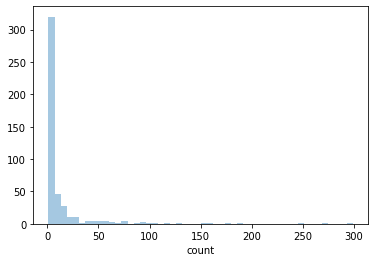

In [70]:
sns.distplot(a=date1['count'], kde=False)
#kde=False is something we'll always provide when creating a histogram, as leaving it out will create a slightly different plot.

TypeError: No loop matching the specified signature and casting was found for ufunc add

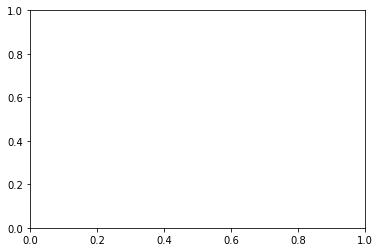

In [71]:
# KDE plot 
sns.kdeplot(data=date1['count'], shade=True)